In [109]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# use latex globally
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-krhf.json', 'r') as f:
    data = json.load(f)

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    # print(d, data[d])
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))
# for d in data_old:
#     basis.append(data_old[d].get('basis', ''))
#     nkpt.append(int(data_old[d].get('nkpt', 0)))
#     ke_cutoff = data_old[d].get('ke_cutoff', 0)
#     if ke_cutoff != 'None':
#         kecut.append(float(ke_cutoff))
#     method.append(data_old[d].get('method', ''))
basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

# print(basis)

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'FFTDF': 'g', 'RSDF': 'y'}

print(basis)

['fftisdf-150-15', 'fftisdf-150-10', 'fftisdf-200-20', 'fftisdf-50-10', 'rsdf-1.1', 'gdf-1.6', 'gdf-1.2', 'rsdf-1.2', 'fftdf-50', 'fftisdf-150-20', 'fftisdf-200-5', 'rsdf-1.4', 'fftisdf-150-5', 'fftisdf-200-15', 'gdf-2.0', 'fftdf-100', 'fftisdf-100-5', 'fftisdf-200-30', 'rsdf-2.0', 'fftisdf-100-10', 'gdf-1.4', 'fftisdf-150-30', 'rsdf-1.8', 'fftisdf-100-25', 'rsdf-2.2', 'fftisdf-50-5', 'fftdf-150', 'fftisdf-100-20', 'gdf-1.8', 'fftisdf-200-25', 'rsdf-1.6', 'fftisdf-50-20', 'fftisdf-50-25', 'gdf-2.2', 'fftisdf-100-30', 'fftisdf-150-25', 'fftdf-200', 'fftisdf-200-10', 'fftisdf-100-15', 'gdf-1.1', 'fftisdf-50-30', 'fftisdf-50-15']
['gth-dzvp']


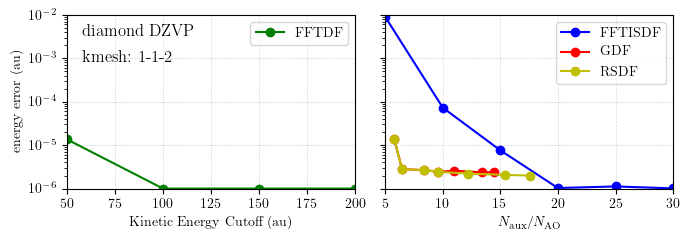

In [110]:
def plot_error_vs_naux(kmesh):
    fig, ax = plt.subplots(1, 2, figsize=(7, 2.5), sharey=True)

    # the first subplot show the convergence of total energy with repsect
    # to ke_cutoff for FFTISDF
    l = []
    for k, v in data.items():
        if k.split('/')[4] == kmesh:
            l.append(v)

    x = []
    e = []
    for il in l:
        if "fftdf" in il["method"]:
            x.append(float(il["method"].split('-')[1]))
            e.append(il["ene_krhf"])

    x = np.array(x)
    e = np.array(e)
    ix = np.argsort(x)
    x = x[ix]
    e = e[ix]

    e0 = e[-1]
    y = abs(e0 - e) + 1e-6

    ax[0].semilogy(x, y, color=color['FFTDF'], label='FFTDF', marker='o')
    ax[0].set_xlabel(r'Kinetic Energy Cutoff (au)')
    ax[0].set_ylabel('energy error (au)')
    ax[0].set_xlim(50, 200)
    ax[0].set_ylim(1e-6, 1e-2)
    ax[0].legend()

    # the second subplot show the convergence of total energy with repsect
    # to naux for FFTISDF, GDF and RSDF

    for m in ['fftisdf', 'gdf', 'rsdf']:
        l = []
        for k, v in data.items():
            if k.split('/')[4] == kmesh and m in v["method"]:
                if m == 'fftisdf':
                    if 'fftisdf-100' in v["method"]:
                        l.append(v)
                else:
                    l.append(v)

        x = []
        e = []
        for il in l:
            x.append(float(il["naux"]) / float(il["nao"]))
            e.append(il["ene_krhf"])

        x = np.array(x)
        e = np.array(e)
        ix = np.argsort(x)
        x = x[ix]
        e = e[ix]
        y = abs(e0 - e) + 1e-6

        ax[1].semilogy(x, y, color=color[m.upper()], label=m.upper(), marker='o')
    ax[1].set_xlabel(r'$N_{\mathrm{aux}}/N_{\mathrm{AO}}$')
    ax[1].set_xlim(5, 30)
    ax[1].legend()

    ax[0].grid(
        which='major',
        linestyle='--',
        linewidth=0.5,
        alpha=0.5
    )
    ax[1].grid(
        which='major',
        linestyle='--',
        linewidth=0.5,
        alpha=0.5
    )

    ax[0].text(0.05, 0.9, r'diamond DZVP', fontsize=12, ha='left', va='center', transform=ax[0].transAxes)
    ax[0].text(0.05, 0.75, r'kmesh: %s' % kmesh, fontsize=12, ha='left', va='center', transform=ax[0].transAxes)

    fig.tight_layout()

plot_error_vs_naux("1-1-2")

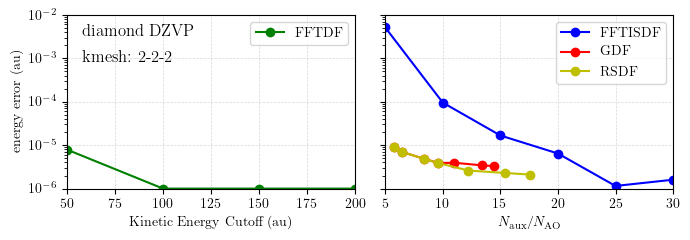

In [111]:
plot_error_vs_naux("2-2-2")

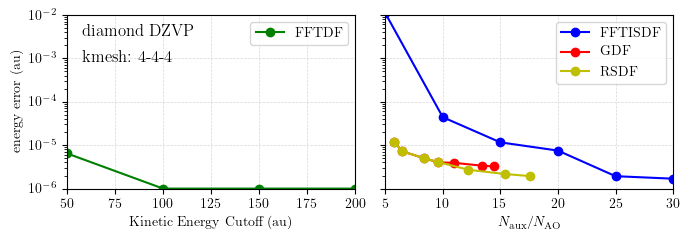

In [112]:
plot_error_vs_naux("4-4-4")